**Import the all necessary library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

**Version of GPU**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jul  4 15:29:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   40C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Import the Twitter Dataset**

In [ ]:
input_file = '/content/Twitter_Data.csv'

**Converted Into DataFrame**

In [ ]:
input_df=pd.read_csv(input_file)
input_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
input_df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


**find Shape of DataFrame**

In [ ]:
input_df.shape

(162980, 2)

**check the Null values present in Data set**

In [ ]:
input_df.isnull().sum()

clean_text    4
category      7
dtype: int64

**Remove null value**

In [ ]:
input_df.dropna(inplace=True)

In [ ]:
input_df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


**Our category column present Float value converted into int**

In [ ]:
input_df['category'] =input_df['category'].astype(int)

**change the label**

*   List item positive(+1)--->postive(2)
*   List item Negative(-1)--->Negative(0)
*   List item Neutral(0)----->neutral(1)





In [ ]:
input_df['category'] = input_df['category'].replace({-1: 0, 0: 1, 1: 2})

In [ ]:
input_df

,clean_text,category
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,1
2,what did just say vote for modi welcome bjp t...,2
3,asking his supporters prefix chowkidar their n...,2
4,answer who among these the most powerful world...,2
...,...,...
162975,why these 456 crores paid neerav modi not reco...,0
162976,dear rss terrorist payal gawar what about modi...,0
162977,did you cover her interaction forum where she ...,1
162978,there big project came into india modi dream p...,1


In [ ]:
null_check = input_df.isnull()
print(null_check.sum())

clean_text    0
category      0
dtype: int64


In [ ]:
input_df.describe()

,category
count,162969.000000
mean,1.225442
std,0.781279
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


**check length of each clean_text**

In [ ]:
input_df['clean_text'].apply(len)

0         210
1          68
2         117
3         212
4          81
         ... 
162975    108
162976    248
162977     51
162978     77
162979    216
Name: clean_text, Length: 162969, dtype: int64

**`below the and above 5 number clean_text in data set`**

In [ ]:
sum(input_df['clean_text'].apply(len)>5),sum(input_df['clean_text'].apply(len)<5)

(162870, 43)

**Keep bigger then 5 word in clean_text**

In [ ]:
input_df=input_df[input_df['clean_text'].apply(len)>5]
print(len(input_df))

162870


**count the number of Label present in each category**

In [ ]:
input_df['category'].value_counts()

category
2    72230
1    55132
0    35508
Name: count, dtype: int64

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
input_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,1
2,what did just say vote for modi welcome bjp t...,2
3,asking his supporters prefix chowkidar their n...,2
4,answer who among these the most powerful world...,2


**check word start with the @ because start of tweet everyone used @**

In [ ]:
import re
def count_handles(text):
    return len(re.findall(r'@[\w]+', text))

input_df['handle_count'] = input_df['clean_text'].apply(count_handles)

input_df

,clean_text,category,handle_count
0,when modi promised “minimum government maximum...,0,0
1,talk all the nonsense and continue all the dra...,1,0
2,what did just say vote for modi welcome bjp t...,2,0
3,asking his supporters prefix chowkidar their n...,2,0
4,answer who among these the most powerful world...,2,0
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,0,0
162976,dear rss terrorist payal gawar what about modi...,0,0
162977,did you cover her interaction forum where she ...,1,0
162978,there big project came into india modi dream p...,1,0


**n0 @ found in any row**

**Check how special character,punchuation and numeric present in clean_text**

In [ ]:
def count_special_characters(text):
    special_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
    return len(special_chars)

def count_punctuation(text):
    punctuation = re.findall(r'[^\w\s]', text)
    return len(punctuation)

def count_numbers(text):
    numbers = re.findall(r'[0-9]', text)
    return len(numbers)

input_df['special_char_count'] = input_df['clean_text'].apply(count_special_characters)
input_df['punctuation_count'] = input_df['clean_text'].apply(count_punctuation)
input_df['number_count'] = input_df['clean_text'].apply(count_numbers)

input_df

,clean_text,category,handle_count,special_char_count,punctuation_count,number_count
0,when modi promised “minimum government maximum...,0,0,2,2,0
1,talk all the nonsense and continue all the dra...,1,0,0,0,0
2,what did just say vote for modi welcome bjp t...,2,0,0,0,0
3,asking his supporters prefix chowkidar their n...,2,0,0,0,0
4,answer who among these the most powerful world...,2,0,0,0,0
...,...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,0,0,0,0,3
162976,dear rss terrorist payal gawar what about modi...,0,0,0,0,4
162977,did you cover her interaction forum where she ...,1,0,0,0,0
162978,there big project came into india modi dream p...,1,0,0,0,0


**count special character,punchuation and numeric present in clean_text**

In [ ]:
total_handle_count = input_df['handle_count'].sum()
total_special_char_count = input_df['special_char_count'].sum()
total_punctuation_count = input_df['punctuation_count'].sum()
total_number_count = input_df['number_count'].sum()

print(f"Total Handle Count: {total_handle_count}")
print(f"Total Special Character Count: {total_special_char_count}")
print(f"Total Punctuation Count: {total_punctuation_count}")
print(f"Total Number Count: {total_number_count}")


Total Handle Count: 0
Total Special Character Count: 47399
Total Punctuation Count: 44266
Total Number Count: 123969


**Now remove all  special character,punchuation and numeric**

In [ ]:
def remove_special_punctuation_numbers(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

input_df['clean_text_more'] = input_df['clean_text'].apply(remove_special_punctuation_numbers)

input_df

,clean_text,category,handle_count,special_char_count,punctuation_count,number_count,clean_text_more
0,when modi promised “minimum government maximum...,0,0,2,2,0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,1,0,0,0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,2,0,0,0,0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,2,0,0,0,0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,2,0,0,0,0,answer who among these the most powerful world...
...,...,...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,0,0,0,0,3,why these crores paid neerav modi not recover...
162976,dear rss terrorist payal gawar what about modi...,0,0,0,0,4,dear rss terrorist payal gawar what about modi...
162977,did you cover her interaction forum where she ...,1,0,0,0,0,did you cover her interaction forum where she ...
162978,there big project came into india modi dream p...,1,0,0,0,0,there big project came into india modi dream p...


In [ ]:
input_df['clean_tweet_'] = input_df['clean_text_more'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
input_df.head()

,clean_text,category,handle_count,special_char_count,punctuation_count,number_count,clean_text_more,clean_tweet_
0,when modi promised “minimum government maximum...,0,0,2,2,0,when modi promised minimum government maximum ...,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,1,0,0,0,0,talk all the nonsense and continue all the dra...,talk nonsense continue drama will vote modi
2,what did just say vote for modi welcome bjp t...,2,0,0,0,0,what did just say vote for modi welcome bjp t...,what just vote modi welcome told rahul main ca...
3,asking his supporters prefix chowkidar their n...,2,0,0,0,0,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar their names...
4,answer who among these the most powerful world...,2,0,0,0,0,answer who among these the most powerful world...,answer among these most powerful world leader ...


**Drop some extra column **

In [ ]:
input_df = input_df.drop(['handle_count','special_char_count','punctuation_count','number_count'], axis=1)

input_df

,clean_text,category,clean_text_more,clean_tweet_
0,when modi promised “minimum government maximum...,0,when modi promised minimum government maximum ...,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,1,talk all the nonsense and continue all the dra...,talk nonsense continue drama will vote modi
2,what did just say vote for modi welcome bjp t...,2,what did just say vote for modi welcome bjp t...,what just vote modi welcome told rahul main ca...
3,asking his supporters prefix chowkidar their n...,2,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar their names...
4,answer who among these the most powerful world...,2,answer who among these the most powerful world...,answer among these most powerful world leader ...
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,0,why these crores paid neerav modi not recover...,these crores paid neerav modi recovered from c...
162976,dear rss terrorist payal gawar what about modi...,0,dear rss terrorist payal gawar what about modi...,dear terrorist payal gawar what about modi kil...
162977,did you cover her interaction forum where she ...,1,did you cover her interaction forum where she ...,cover interaction forum where left
162978,there big project came into india modi dream p...,1,there big project came into india modi dream p...,there project came into india modi dream proje...


In [ ]:
input_df.columns

Index(['clean_text', 'category', 'clean_text_more', 'clean_tweet_'], dtype='object')

**Stemming apply like running---> run**

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [ ]:
stemmer = PorterStemmer()


In [ ]:
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
input_df['clean_tweet_'] = input_df['clean_tweet_'].apply(stem_text)


In [ ]:
input_df

,clean_text,category,clean_text_more,clean_tweet_
0,when modi promised “minimum government maximum...,0,when modi promised minimum government maximum ...,when modi promis minimum govern maximum govern...
1,talk all the nonsense and continue all the dra...,1,talk all the nonsense and continue all the dra...,talk nonsens continu drama will vote modi
2,what did just say vote for modi welcome bjp t...,2,what did just say vote for modi welcome bjp t...,what just vote modi welcom told rahul main cam...
3,asking his supporters prefix chowkidar their n...,2,asking his supporters prefix chowkidar their n...,ask support prefix chowkidar their name modi g...
4,answer who among these the most powerful world...,2,answer who among these the most powerful world...,answer among these most power world leader tod...
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,0,why these crores paid neerav modi not recover...,these crore paid neerav modi recov from congre...
162976,dear rss terrorist payal gawar what about modi...,0,dear rss terrorist payal gawar what about modi...,dear terrorist payal gawar what about modi kil...
162977,did you cover her interaction forum where she ...,1,did you cover her interaction forum where she ...,cover interact forum where left
162978,there big project came into india modi dream p...,1,there big project came into india modi dream p...,there project came into india modi dream proje...


**load in excel file and applied to BERT Prediction**

In [ ]:
import pandas as pd
output_file = '/content/modified_input_df.xlsx'
input_df.to_excel(output_file, index=False)

from google.colab import files
files.download(output_file)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install wordcloud

In [ ]:
input_df.isnull().sum()

clean_text         0
category           0
clean_text_more    0
clean_tweet_       0
dtype: int64

**frequecy of word is hight then word look more bold**

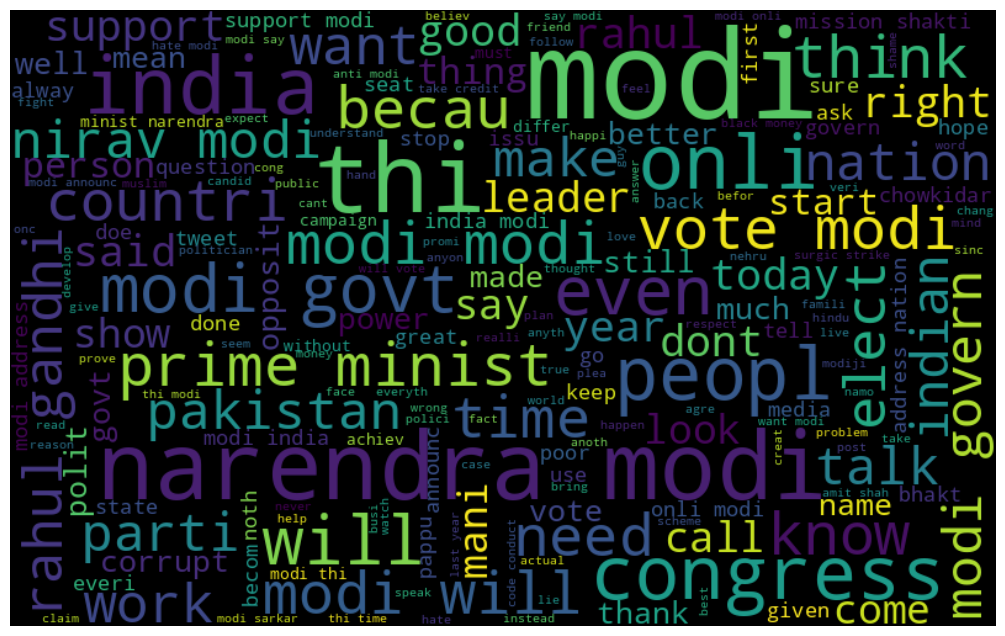

In [ ]:
all_words = " ".join([sentence for sentence in input_df['clean_tweet_']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**frequent words visualization for +ve**

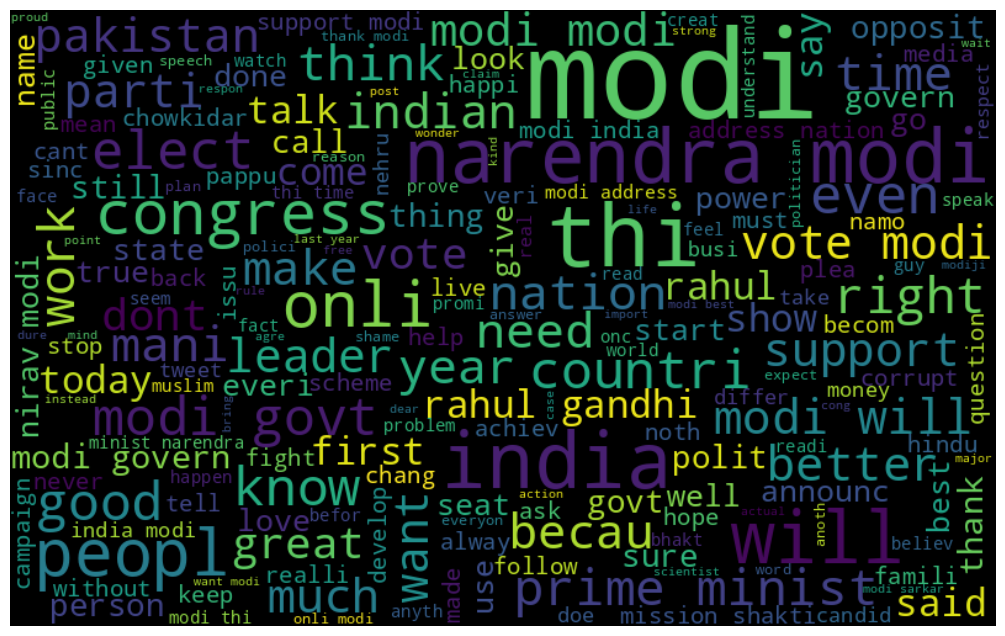

In [ ]:
all_words = " ".join([sentence for sentence in input_df['clean_tweet_'][input_df['category']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**frequent words visualization for -ive**

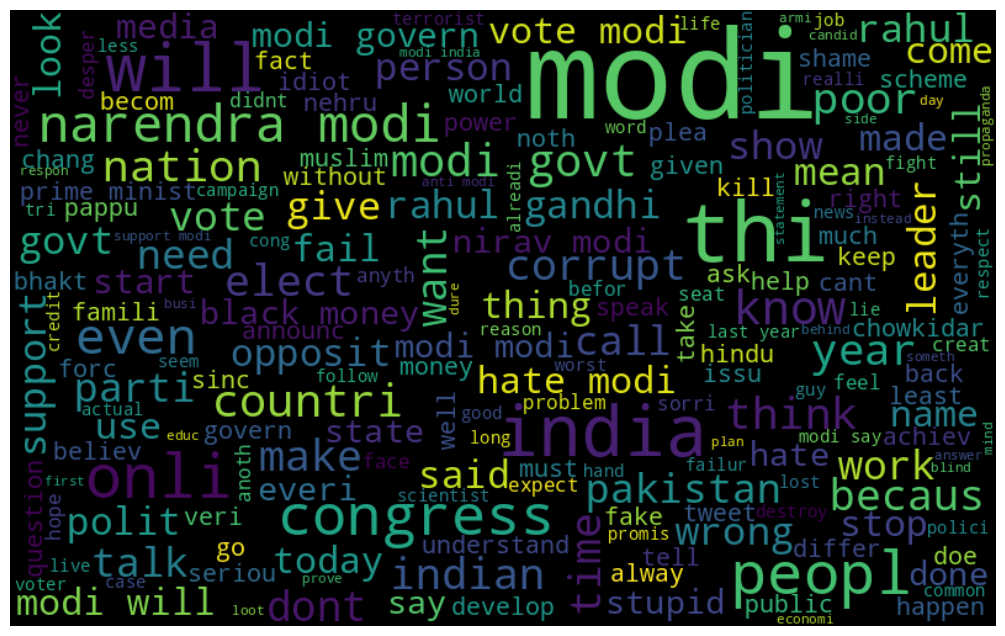

In [ ]:
all_words = " ".join([sentence for sentence in input_df['clean_tweet_'][input_df['category']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**frequent words visualization for nuetral**

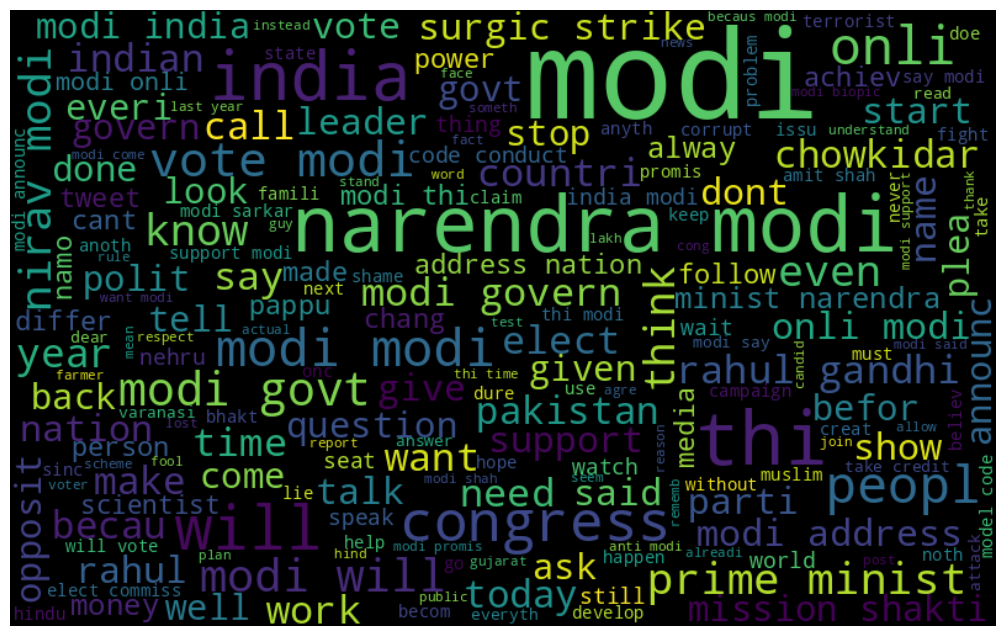

In [ ]:
all_words = " ".join([sentence for sentence in input_df['clean_tweet_'][input_df['category']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


**Concatenate all 'clean_tweet_' texts where category is neutral**

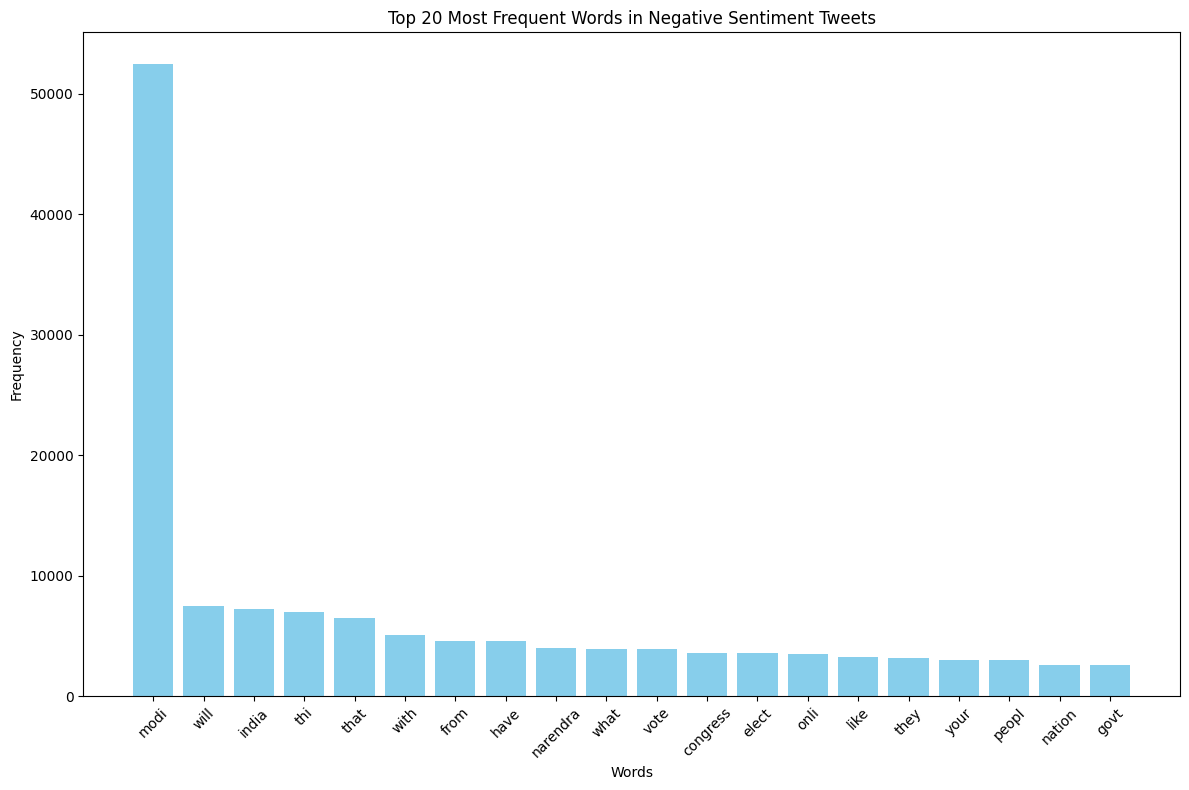

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
all_words = " ".join(input_df[input_df['category'] == 1]['clean_tweet_'])
words = all_words.split()
word_freq = Counter(words)
top_words = word_freq.most_common(20)
top_words, frequencies = zip(*top_words)
plt.figure(figsize=(12, 8))
plt.bar(top_words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Negative Sentiment Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


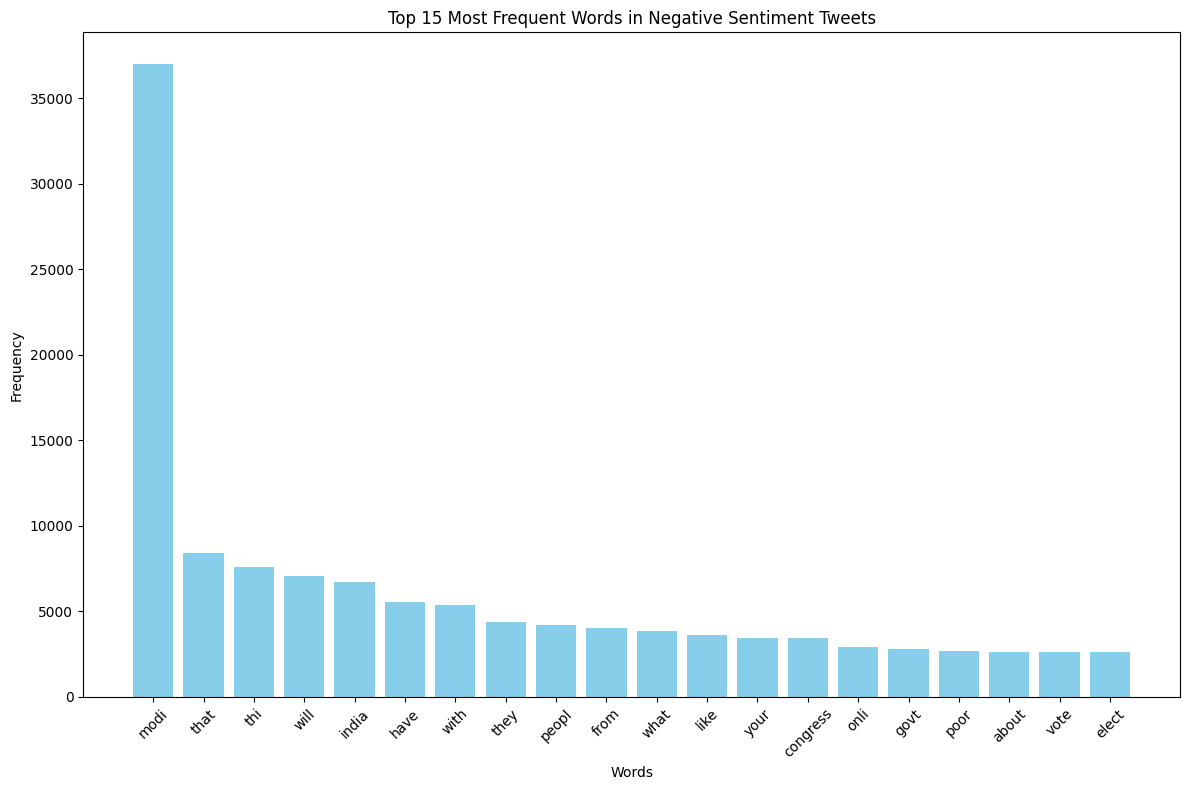

In [ ]:

all_words = " ".join(input_df[input_df['category'] == 0]['clean_tweet_'])
words = all_words.split()
word_freq = Counter(words)
top_words = word_freq.most_common(20)
top_words, frequencies = zip(*top_words)
plt.figure(figsize=(12, 8))
plt.bar(top_words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words in Negative Sentiment Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Concatenate all 'clean_tweet_' texts where category is +ive**

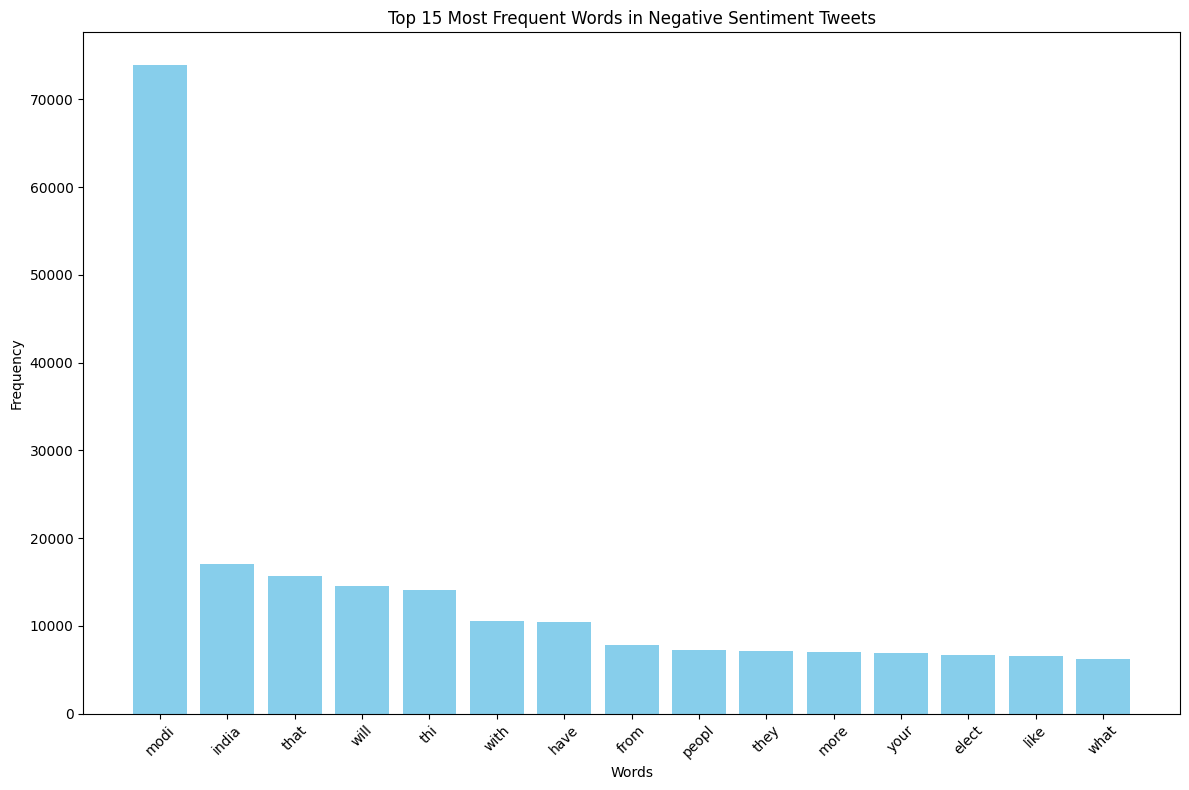

In [ ]:
all_words = " ".join(input_df[input_df['category'] == 2]['clean_tweet_'])
words = all_words.split()
word_freq = Counter(words)
top_words = word_freq.most_common(15)
top_words, frequencies = zip(*top_words)
plt.figure(figsize=(12, 8))
plt.bar(top_words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words in Negative Sentiment Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=100000, stop_words='english')
bow = bow_vectorizer.fit_transform(input_df['clean_tweet_'])

**splitting the data set train and test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, input_df['category'], random_state=42, test_size=0.25)

**LogisticRegression method is used for training and Testing**

1. Bag of Words (Count Vectorizer)
2. TF-IDF Vectorizer
3. Word2Vec
4. FastText

**Logistic regression Method Use for training and Testing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming input_df and tokens are already defined as in your previous code

vectorizations = {}

# 1. Bag of Words (Count Vectorizer)
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=100000, stop_words='english')
vectorizations['bow'] = bow_vectorizer.fit_transform(input_df['clean_tweet_'])

# 2. TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=100000, stop_words='english')
vectorizations['tfidf'] = tfidf_vectorizer.fit_transform(input_df['clean_tweet_'])

# 3. Word2Vec
word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)
word2vec_vectors = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in tokens]
vectorizations['word2vec'] = np.array(word2vec_vectors)

# 4. FastText
fasttext_model = FastText(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)
fasttext_vectors = [np.mean([fasttext_model.wv[word] for word in words if word in fasttext_model.wv] or [np.zeros(100)], axis=0) for words in tokens]
vectorizations['fasttext'] = np.array(fasttext_vectors)

# Define classifiers
logreg = LogisticRegression(max_iter=1000)
classifiers = [('Logistic Regression', logreg)]

# Train and evaluate each vectorization method with each classifier
for vec_name, vec_data in vectorizations.items():
    print(f"Vectorization: {vec_name}")
    x_train, x_test, y_train, y_test = train_test_split(vec_data, input_df['category'], random_state=42, test_size=0.25)

    for clf_name, clf in classifiers:
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='macro')
        recall = recall_score(y_test, pred, average='macro')
        f1 = f1_score(y_test, pred, average='macro')

        # Print metrics
        print(f"Classifier: {clf_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        # Generate confusion matrix
        cm = confusion_matrix(y_test, pred)
        print("Confusion Matrix:")
        print(cm)

        print()  # Separate different vectorization or classifier outputs


Vectorization: bow
Classifier: Logistic Regression
Accuracy: 0.7975
Precision: 0.7917
Recall: 0.7857
F1-score: 0.7864
Confusion Matrix:
[[ 6057  1183  1516]
 [  532 12151  1149]
 [ 1289  2575 14266]]

Vectorization: tfidf
Classifier: Logistic Regression
Accuracy: 0.7935
Precision: 0.7918
Recall: 0.7782
F1-score: 0.7811
Confusion Matrix:
[[ 5813  1408  1535]
 [  469 12213  1150]
 [ 1100  2746 14284]]

Vectorization: word2vec
Classifier: Logistic Regression
Accuracy: 0.6166
Precision: 0.5886
Recall: 0.5614
F1-score: 0.5628
Confusion Matrix:
[[ 2446  2078  4232]
 [ 1102  9049  3681]
 [ 1331  3188 13611]]

Vectorization: fasttext
Classifier: Logistic Regression
Accuracy: 0.6100
Precision: 0.5822
Recall: 0.5558
F1-score: 0.5575
Confusion Matrix:
[[ 2470  2120  4166]
 [ 1165  8844  3823]
 [ 1343  3261 13526]]



**Logistic regression Method Use for training and**

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec, FastText
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



vectorizations = {}

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=100000, stop_words='english')
vectorizations['bow'] = bow_vectorizer.fit_transform(input_df['clean_tweet_'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=100000, stop_words='english')
vectorizations['tfidf'] = tfidf_vectorizer.fit_transform(input_df['clean_tweet_'])

word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)
word2vec_vectors = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in tokens]
vectorizations['word2vec'] = np.array(word2vec_vectors)

fasttext_model = FastText(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)
fasttext_vectors = [np.mean([fasttext_model.wv[word] for word in words if word in fasttext_model.wv] or [np.zeros(100)], axis=0) for words in tokens]
vectorizations['fasttext'] = np.array(fasttext_vectors)

random_forest = RandomForestClassifier(random_state=42)
classifiers = [('Random Forest', random_forest)]

for vec_name, vec_data in vectorizations.items():
    print(f"Vectorization: {vec_name}")
    x_train, x_test, y_train, y_test = train_test_split(vec_data, input_df['category'], random_state=42, test_size=0.25)

    for clf_name, clf in classifiers:
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='macro')
        recall = recall_score(y_test, pred, average='macro')
        f1 = f1_score(y_test, pred, average='macro')

        print(f"Classifier: {clf_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        cm = confusion_matrix(y_test, pred)
        print("Confusion Matrix:")
        print(cm)

        print()


Vectorization: bow
Classifier: Random Forest
Accuracy: 0.7775
Precision: 0.7828
Recall: 0.7510
F1-score: 0.7580
Confusion Matrix:
[[ 5031  1633  2092]
 [  322 12231  1279]
 [  890  2842 14398]]

Vectorization: tfidf
Classifier: Random Forest
Accuracy: 0.7705
Precision: 0.7805
Recall: 0.7371
F1-score: 0.7485
Confusion Matrix:
[[ 4764  1360  2632]
 [  308 11639  1885]
 [  756  2402 14972]]

Vectorization: word2vec
Classifier: Random Forest
Accuracy: 0.6292
Precision: 0.6247
Recall: 0.5655
F1-score: 0.5670
Confusion Matrix:
[[ 2147  1714  4895]
 [  554  9136  4142]
 [  902  2893 14335]]

Vectorization: fasttext
Classifier: Random Forest
Accuracy: 0.6301
Precision: 0.6262
Recall: 0.5668
F1-score: 0.5680
Confusion Matrix:
[[ 2156  1825  4775]
 [  561  9221  4050]
 [  853  2999 14278]]

